<a href="https://colab.research.google.com/github/cybermin/pythonbasic/blob/master/03/python03_5_bs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beautiful Soup 모듈
+ HTML 및 XML 문서 를 구문 분석하기 위한 Python 패키지
+ DOM 추출
+ 기본적으로 UTF-8 인코딩 방식이지만 CP949도 지원

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
#웹 페이지 읽어 오기
from urllib.request import urlopen
from urllib import parse

In [ ]:
#영화 공공데이터 : http://www.kobis.or.kr/kobisopenapi/homepg/apiservice/searchServiceInfo.do

mykey='430156241533f1d058c603178cc3ca0e'
mytargetDt='20120101'

url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.xml?'
url = url + 'key=' + mykey
url = url + '&targetDt='+ mytargetDt

data = urlopen(url).read().decode('utf-8')
print(data)
print(type(data))

<?xml version="1.0" encoding="utf-8" standalone="yes"?><boxOfficeResult><boxofficeType>일별 박스오피스</boxofficeType><showRange>20120101~20120101</showRange><dailyBoxOfficeList><dailyBoxOffice><rnum>1</rnum><rank>1</rank><rankInten>0</rankInten><rankOldAndNew>OLD</rankOldAndNew><movieCd>20112207</movieCd><movieNm>미션임파서블:고스트프로토콜</movieNm><openDt>2011-12-15</openDt><salesAmt>2776060500</salesAmt><salesShare>36.3</salesShare><salesInten>-415699000</salesInten><salesChange>-13</salesChange><salesAcc>40541108500</salesAcc><audiCnt>353274</audiCnt><audiInten>-60106</audiInten><audiChange>-14.5</audiChange><audiAcc>5328435</audiAcc><scrnCnt>697</scrnCnt><showCnt>3223</showCnt></dailyBoxOffice><dailyBoxOffice><rnum>2</rnum><rank>2</rank><rankInten>1</rankInten><rankOldAndNew>OLD</rankOldAndNew><movieCd>20110295</movieCd><movieNm>마이 웨이</movieNm><openDt>2011-12-21</openDt><salesAmt>1189058500</salesAmt><salesShare>15.6</salesShare><salesInten>-105894500</salesInten><salesChange>-8.2</salesChange><sale

###  BeautifulSoup 객체 생성


```
인스턴스명 = BeautifulSoup(markup, parser)
```
#### **파서(parser) 종류**
+ html.parser : 파이썬 표준 라이브러리에 포함된 파서로 빠르지만 유연하지 않기 때문에 단순한 HTML문서에 사용

    ```
    BeautifulSoup(markup, "html.parser")
    ```

+ lxml : 매우 빠르고 유연하지만 외부 의존
 - lxml의 HTML 파서
    ```
    BeautifulSoup(markup, "lxml")
    ```
 - lxml의 XML 파서
     ```
    BeautifulSoup(markup, "lxml-xml")
    ```

+ html5lib : 웹 브라우저와 동일한 방식으로 페이지 구문 분석하는 파서로 매우 느리지만 매우 유연하지만 외부 의존
    ```
    BeautifulSoup(markup, "html5lib")
    ```

## **공공데이터 (XML데이터) 가져오기**

In [ ]:
# BeautifulSoup 인스턴스 생성
soup = BeautifulSoup(data, 'lxml-xml')

#### **Beautiful Soup 태그 파싱**
+ 태그명
+ **find(태그명)**
 - 조건에 맞는 태그 1개만 찾음 
+ **find_all(태그명)**
 - 조건에 맞는 모드 태그 찾음
 - find_all(태그명,limit=n) : n개 찾음

In [ ]:
dailyBoxOffice = soup.dailyBoxOffice
print(dailyBoxOffice)

<dailyBoxOffice><rnum>1</rnum><rank>1</rank><rankInten>0</rankInten><rankOldAndNew>OLD</rankOldAndNew><movieCd>20112207</movieCd><movieNm>미션임파서블:고스트프로토콜</movieNm><openDt>2011-12-15</openDt><salesAmt>2776060500</salesAmt><salesShare>36.3</salesShare><salesInten>-415699000</salesInten><salesChange>-13</salesChange><salesAcc>40541108500</salesAcc><audiCnt>353274</audiCnt><audiInten>-60106</audiInten><audiChange>-14.5</audiChange><audiAcc>5328435</audiAcc><scrnCnt>697</scrnCnt><showCnt>3223</showCnt></dailyBoxOffice>


In [ ]:
# 태그 찾기
dailyBoxOffice = soup.find('dailyBoxOffice')
print(dailyBoxOffice)

<dailyBoxOffice><rnum>1</rnum><rank>1</rank><rankInten>0</rankInten><rankOldAndNew>OLD</rankOldAndNew><movieCd>20112207</movieCd><movieNm>미션임파서블:고스트프로토콜</movieNm><openDt>2011-12-15</openDt><salesAmt>2776060500</salesAmt><salesShare>36.3</salesShare><salesInten>-415699000</salesInten><salesChange>-13</salesChange><salesAcc>40541108500</salesAcc><audiCnt>353274</audiCnt><audiInten>-60106</audiInten><audiChange>-14.5</audiChange><audiAcc>5328435</audiAcc><scrnCnt>697</scrnCnt><showCnt>3223</showCnt></dailyBoxOffice>


In [ ]:
# 태그 찾기
dailyBoxOffice = soup.find_all('dailyBoxOffice')
for item in dailyBoxOffice:
    print(item)

<dailyBoxOffice><rnum>1</rnum><rank>1</rank><rankInten>0</rankInten><rankOldAndNew>OLD</rankOldAndNew><movieCd>20112207</movieCd><movieNm>미션임파서블:고스트프로토콜</movieNm><openDt>2011-12-15</openDt><salesAmt>2776060500</salesAmt><salesShare>36.3</salesShare><salesInten>-415699000</salesInten><salesChange>-13</salesChange><salesAcc>40541108500</salesAcc><audiCnt>353274</audiCnt><audiInten>-60106</audiInten><audiChange>-14.5</audiChange><audiAcc>5328435</audiAcc><scrnCnt>697</scrnCnt><showCnt>3223</showCnt></dailyBoxOffice>
<dailyBoxOffice><rnum>2</rnum><rank>2</rank><rankInten>1</rankInten><rankOldAndNew>OLD</rankOldAndNew><movieCd>20110295</movieCd><movieNm>마이 웨이</movieNm><openDt>2011-12-21</openDt><salesAmt>1189058500</salesAmt><salesShare>15.6</salesShare><salesInten>-105894500</salesInten><salesChange>-8.2</salesChange><salesAcc>13002897500</salesAcc><audiCnt>153501</audiCnt><audiInten>-16465</audiInten><audiChange>-9.7</audiChange><audiAcc>1739543</audiAcc><scrnCnt>588</scrnCnt><showCnt>232

In [ ]:
dailyBoxOffice = soup.find_all('dailyBoxOffice', limit=2)
for item in dailyBoxOffice:
    print(item)

<dailyBoxOffice><rnum>1</rnum><rank>1</rank><rankInten>0</rankInten><rankOldAndNew>OLD</rankOldAndNew><movieCd>20112207</movieCd><movieNm>미션임파서블:고스트프로토콜</movieNm><openDt>2011-12-15</openDt><salesAmt>2776060500</salesAmt><salesShare>36.3</salesShare><salesInten>-415699000</salesInten><salesChange>-13</salesChange><salesAcc>40541108500</salesAcc><audiCnt>353274</audiCnt><audiInten>-60106</audiInten><audiChange>-14.5</audiChange><audiAcc>5328435</audiAcc><scrnCnt>697</scrnCnt><showCnt>3223</showCnt></dailyBoxOffice>
<dailyBoxOffice><rnum>2</rnum><rank>2</rank><rankInten>1</rankInten><rankOldAndNew>OLD</rankOldAndNew><movieCd>20110295</movieCd><movieNm>마이 웨이</movieNm><openDt>2011-12-21</openDt><salesAmt>1189058500</salesAmt><salesShare>15.6</salesShare><salesInten>-105894500</salesInten><salesChange>-8.2</salesChange><salesAcc>13002897500</salesAcc><audiCnt>153501</audiCnt><audiInten>-16465</audiInten><audiChange>-9.7</audiChange><audiAcc>1739543</audiAcc><scrnCnt>588</scrnCnt><showCnt>232

#### BeautifulSoup  텍스트를 추출 
+ text
+ get_text() 
+ string


In [ ]:
dailyBoxOffice = soup.find('dailyBoxOffice') 
print(dailyBoxOffice.text)

110OLD20112207미션임파서블:고스트프로토콜2011-12-15277606050036.3-415699000-1340541108500353274-60106-14.553284356973223


In [ ]:
dailyBoxOffice = soup.find('dailyBoxOffice').find('movieNm')
print(dailyBoxOffice.text)

미션임파서블:고스트프로토콜


In [ ]:
dailyBoxOffice = soup.find('dailyBoxOffice') 
print(dailyBoxOffice.get_text())

110OLD20112207미션임파서블:고스트프로토콜2011-12-15277606050036.3-415699000-1340541108500353274-60106-14.553284356973223


In [ ]:
dailyBoxOffice = soup.find('dailyBoxOffice').find('movieNm')
print(dailyBoxOffice.get_text())

미션임파서블:고스트프로토콜


In [ ]:
dailyBoxOffice = soup.find('dailyBoxOffice') 
print(dailyBoxOffice.string)

None


In [ ]:
dailyBoxOffice = soup.find('dailyBoxOffice').find('movieNm')
print(dailyBoxOffice.string)

미션임파서블:고스트프로토콜


In [ ]:
dailyBoxOffice = soup.find_all('dailyBoxOffice')
for item in dailyBoxOffice:
    print(item.find('movieNm').get_text())

미션임파서블:고스트프로토콜
마이 웨이
셜록홈즈 : 그림자 게임
퍼펙트 게임
프렌즈: 몬스터섬의비밀 
라이온 킹
오싹한 연애
극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」
앨빈과 슈퍼밴드3
극장판 포켓몬스터 베스트 위시 「비크티니와 흑의 영웅 제크로무」


## 웹 크롤링(web crawling)
+ 인터넷 상에 존재하는 자료를  수집하여 데이터를 파싱하여 원하는 정보를 추출하는 것

In [ ]:
# 네이버 영화 사이트에서 영화 순위 : https://movie.naver.com/movie/sdb/rank/rmovie.nhn

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
html = urlopen(url).read().decode('utf-8')

print(html)

UnicodeDecodeError: ignored

In [ ]:
# encoding 문자 찾기 
html = urlopen(url).read()
html2014 = html[:1024].decode('ascii', errors='replace') 
#print(html2014)

In [ ]:
import re

In [ ]:

encode = re.search(r'charset=["\']*([\w-]+)',html2014) 

print(encode.group(1))

euc-kr


In [ ]:
# html 문서의 처음 부분을 가져와서 charset을 추출 
def url_charset(html1024):
    html2014 = html1024.decode('ascii', errors='replace') 
    encoding = re.search(r'charset=["\']*([\w-]+)',html2014) 

    if encoding :
        encoding = encoding.group(1)  
    else :
        encoding = 'utf-8'

    return encoding

In [ ]:
# 바이트 코드로 읽어진 html 문서 charset에 맞게 decode
def url_html(url):
    html = urlopen(url).read()  
    encoding = url_charset(html[:1024])

    html = html.decode(encoding)
    return html

In [ ]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'

naver = url_html(url)
print(naver[:1024])

In [ ]:
url = 'https://movie.daum.net/boxoffice/weekly'

daum = url_html(url)
print(daum[:1024])

### **Beautiful Soup CSS선택자**
+ select_one(선택자)
+ select(선택자)


In [ ]:
naverbs = BeautifulSoup(naver, 'html.parser')

tit3 = naverbs.select(".tit3")[:10]
for item in tit3:
    print(item.text.replace('\n',''))

#살아있다
결백
사라진 시간
침입자
온워드: 단 하루의 기적
반도
인베이젼 2020
소리꾼
야구소녀
다크 나이트


In [ ]:
daumbs = BeautifulSoup(daum, 'html.parser')
#print(daumbs)

tit3 = daumbs.select(".tit_join  .link_g")  
for item in tit3:
    print(item.text.replace('\n',''))

#살아있다
결백
온워드: 단 하루의 기적
사라진 시간
배트맨 비긴즈
위대한 쇼맨
침입자
야구소녀
엔딩스 비기닝스
슬럼독 밀리어네어




---
해결문제 ) 네이버 평점 사이트에서 30개의 데이터를 추출하여 평점의 평균을 구하시오.

+ https://movie.naver.com/movie/point/af/list.nhn?&page=1


---



In [ ]:
dt = {}
 
for pg in range(1,4): 
    url = 'https://movie.naver.com/movie/point/af/list.nhn?&page=' + str(pg)

    naver = url_html(url)
    naverbs = BeautifulSoup(naver, 'html.parser')

    title = naverbs.select('.title')
    for item in title:
        key = item.select_one('a').text
        vc = []
        value = int(item.select_one('em').text)

        if key in dt.keys() : 
            dt[key][0] = dt[key][0] + value 
            dt[key][1] = dt[key][1] + 1 
        else :         
            vc.append(value)
            vc.append(1)
            dt[key] = vc
        #print(key, value)
        #print(str(pg) , '*'*60)


for key , value in dt.items() :
    dt[key] = sum(value) / len(value)

for key , value in dt.items() :
    print(key , ':', value)

우상 : 6.5
위대한 쇼맨 : 5.5
늑대의 유혹 : 5.5
애드 아스트라 : 5.5
사라진 시간 : 5.5
마약왕 : 5.5
침입자 : 2.5
페이스 오프 : 5.5
#살아있다 : 2.0
에이리언 2 : 4.5
온워드: 단 하루의 기적 : 5.5
파괴자들 : 4.0
다크 나이트 : 11.0
더 콜러 : 5.0
콜 미 바이 유어 네임 : 5.5
라스트 캐슬 : 1.5
컨테이젼 : 5.5
정직한 후보 : 5.5
소리꾼 : 1.5
특별수사: 사형수의 편지 : 5.5
더 플랫폼 : 5.5


In [ ]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

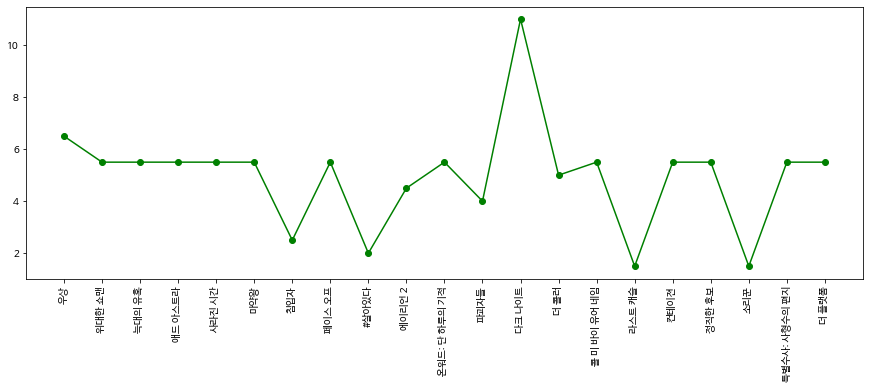

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(list(dt.keys()), list(dt.values()), 'go-')
plt.xticks(rotation=90)
plt.show()